# Chocolate

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

### Import Data and Explore

In [2]:
chocolate = pd.read_csv('flavors_of_cacao.csv')

In [3]:
chocolate.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [5]:
# Delete Missing Value Entries
chocolate = chocolate.dropna()

In [6]:
# Rename Columns with Weird Formatting
chocolate = chocolate.rename(columns = {'Company\xa0\n(Maker-if known)':'Company',
                                        'Specific Bean Origin\nor Bar Name':'Specific_Bean_Origin_or_Bar_Name',
                                        'Review\nDate':'Review_Date',
                                        'Cocoa\nPercent':'Cocoa_Percent',
                                        'Company\nLocation':'Company_Location',
                                        'Bean\nType':'Bean_Type',
                                        'Broad Bean\nOrigin':'Broad_Bean_Origin'}) 

### Questions

In [7]:
# How many tuples are there in the dataset? (rows)
index = chocolate.index
number_of_tuples = len(index)
number_of_tuples

1793

In [8]:
# How many unique company names are there in the dataset?
chocolate['Company'].nunique()

416

In [9]:
# How many reviews are made in 2013 in the dataset?
len(chocolate[chocolate['Review_Date'] == 2013])

184

In [10]:
# In the BeanType Column, how many missing values are there?
# Check values present
chocolate['Bean_Type'].value_counts()

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
EET                           3
Matina                        3
Beniano                       3
Nacional                      2
Trinitario (85% Criollo)      2
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Amazon mix                    2
Forastero (Catongo)           2
Amazon, ICS                   2
Criollo (Amarru)              2
Criollo, Forastero            2
Trinitario, TCGA              1
Forastero(Arriba, CCN)        1
Trinitario, Nacional          1
Criollo (Ocumare 77)          1
Trinitario (Scavina)          1
Blend-Forastero,Criollo       1
Trinitar

In [11]:
# Appears to be a blanked out value, replace white space with NaN
chocolate_cut = chocolate.replace(r'^\s*$', np.nan, regex=True)

In [12]:
# In the BeanType Column, how many missing values are there?
chocolate_cut['Bean_Type'].isnull().sum(axis=0)

887

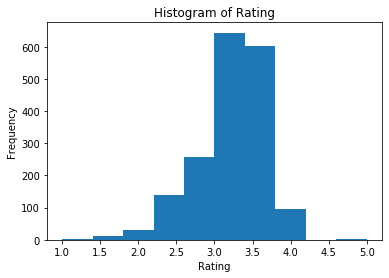

In [13]:
#Visualize the ratings column with a histogram
plt.hist(chocolate['Rating'])
plt.title("Histogram of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [14]:
#Ratings are most frequent between 3 and 3.5
#Histogram skewed toward lower ratings

In [15]:
# Change the type of values in the column percent from string values to numerical values.
chocolate['Cocoa_Percent'] = chocolate['Cocoa_Percent'].apply(lambda x: x.replace('%', '')).astype('float') / 100

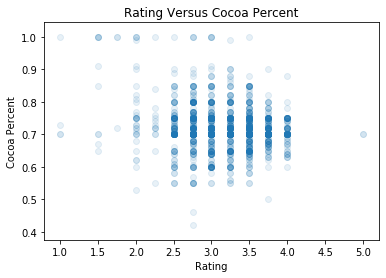

In [16]:
# Plot the converted numerical Cocoa Percent values against the Rating values
plt.scatter(chocolate['Rating'], chocolate['Cocoa_Percent'], alpha=0.1)
plt.title("Rating Versus Cocoa Percent")
plt.xlabel("Rating")
plt.ylabel("Cocoa Percent")
plt.show()

In [17]:
# From what you see, does more cocoa in a bar correspond to a higher rating?
# No, higher ratings seem to be centered closer to 70% cocoa

In [18]:
#Normalize the Ratings Column and print the results.
X = chocolate['Rating'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
chocolate['Rating'] = scaled_X
print(scaled_X)

[[0.6875]
 [0.4375]
 [0.5   ]
 ...
 [0.625 ]
 [0.5625]
 [0.5   ]]


In [19]:
# List the companies ordered by their average score (averaged over each company’s reviews).
cs = chocolate.groupby('Company')['Rating'].mean()
css = cs.sort_values(ascending=False)
print(css)

Company
Tobago Estate (Pralus)                  0.750000
Heirloom Cacao Preservation (Zokoko)    0.718750
Ocelot                                  0.718750
Amedei                                  0.711538
Matale                                  0.703125
Patric                                  0.697917
Idilio (Felchlin)                       0.693750
Timo A. Meyer                           0.687500
Christopher Morel (Felchlin)            0.687500
Chocola'te                              0.687500
Obolo                                   0.687500
Un Dimanche A Paris                     0.687500
Kerchner                                0.687500
Dole (Guittard)                         0.687500
Acalli                                  0.687500
Benoit Nihant                           0.677083
Madecasse (Cinagra)                     0.671875
Cacao Sampaka                           0.666667
Just Good Chocolate                     0.666667
Franceschi                              0.656250
Captain Pemb

In [20]:
#Suppose we are interested in the company’s names and locations for some collective analysis. 
#Encode the two categorical columns with the encoder you think is best for the job.
X = chocolate[['Company','Company_Location']]
encoder = OrdinalEncoder()
encoded_X = encoder.fit_transform(X)
print(encoded_X)

[[  0.  18.]
 [  0.  18.]
 [  0.  18.]
 ...
 [410.   3.]
 [410.   3.]
 [410.   3.]]
